### Gaussian Mixture Models(GMM)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [6]:
from sklearn.datasets._samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.6, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

/home/lingwenpan/miniconda3/envs/data_science/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


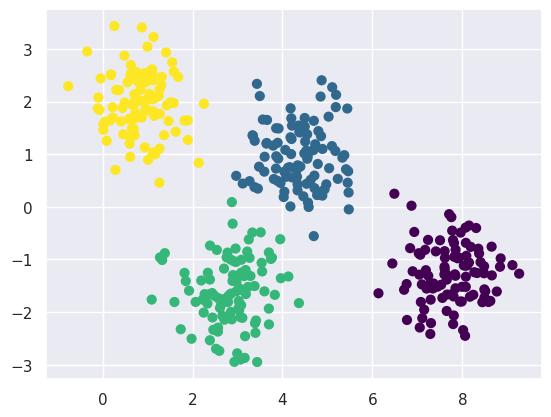

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap="viridis")

In [8]:
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_cluster=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    ax = ax or plt.gca()
    ax.axis("equal")
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap="viridis", zorder=2)

    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc="#CCCCCC", lw=3, alpha=0.5, zorder=1))

/home/lingwenpan/miniconda3/envs/data_science/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


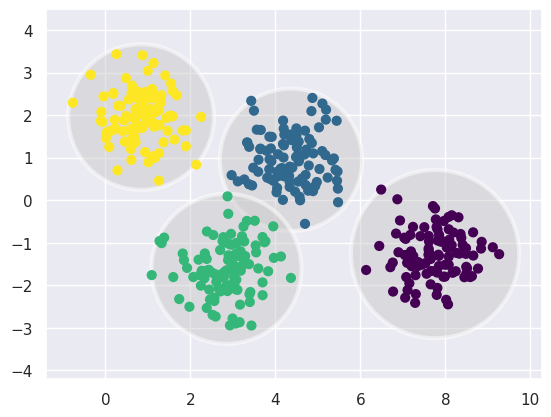

In [9]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

/home/lingwenpan/miniconda3/envs/data_science/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


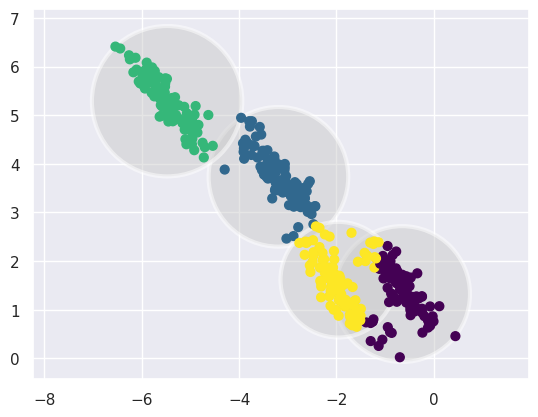

In [10]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

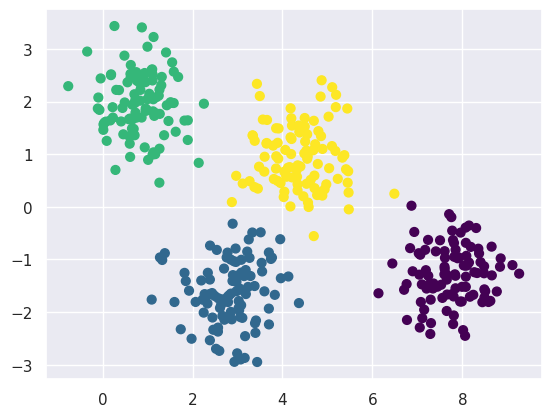

In [11]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap="viridis")

In [12]:
# predict_proba: 量測任一資料點屬於某一給定群組的機率
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.469 0.    0.    0.531]
 [0.    1.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    1.    0.    0.   ]]


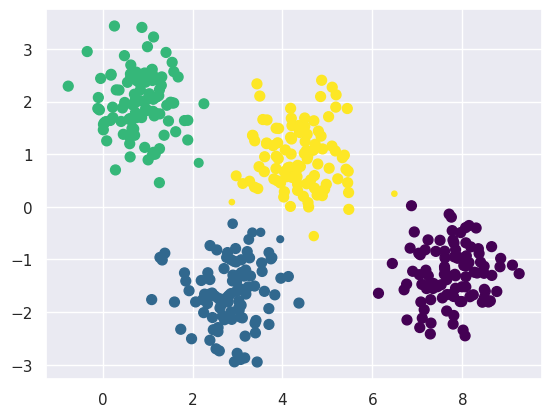

In [13]:
size = 50 * probs.max(1) ** 2 # 平方差強調差值
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=size)

In [16]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()

    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
        print("U: ", U)
        print("s: ", s)
        print("Vt: ", Vt)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

In [19]:
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit_predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap="viridis", zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis("equal")

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w*w_factor)

U:  [[-0.7725149  -0.63499663]
 [-0.63499663  0.7725149 ]]
s:  [0.40699165 0.35160832]
Vt:  [[-0.7725149  -0.63499663]
 [-0.63499663  0.7725149 ]]
U:  [[-0.98660124 -0.16315024]
 [-0.16315024  0.98660124]]
s:  [0.36744211 0.28708059]
Vt:  [[-0.98660124 -0.16315024]
 [-0.16315024  0.98660124]]
U:  [[-0.40656478  0.91362196]
 [ 0.91362196  0.40656478]]
s:  [0.35261203 0.28681002]
Vt:  [[-0.40656478  0.91362196]
 [ 0.91362196  0.40656478]]
U:  [[-0.99772208  0.06745858]
 [ 0.06745858  0.99772208]]
s:  [0.40414598 0.36917882]
Vt:  [[-0.99772208  0.06745858]
 [ 0.06745858  0.99772208]]


/tmp/ipykernel_536/2286699694.py:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


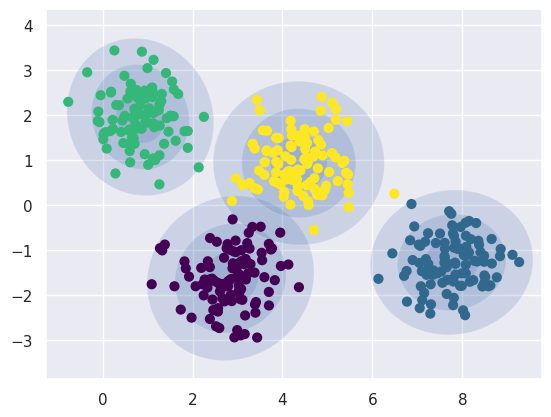

In [20]:
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)

U:  [[-0.61177454  0.79103218]
 [ 0.79103218  0.61177454]]
s:  [0.48744345 0.02451755]
Vt:  [[-0.61177454  0.79103218]
 [ 0.79103218  0.61177454]]
U:  [[-0.62864821  0.7776898 ]
 [ 0.7776898   0.62864821]]
s:  [0.4848912  0.02571847]
Vt:  [[-0.62864821  0.7776898 ]
 [ 0.7776898   0.62864821]]
U:  [[-0.62801301  0.77820284]
 [ 0.77820284  0.62801301]]
s:  [0.44226988 0.0196332 ]
Vt:  [[-0.62801301  0.77820284]
 [ 0.77820284  0.62801301]]
U:  [[-0.62352337  0.78180472]
 [ 0.78180472  0.62352337]]
s:  [0.34821678 0.02412795]
Vt:  [[-0.62352337  0.78180472]
 [ 0.78180472  0.62352337]]


/tmp/ipykernel_536/2286699694.py:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


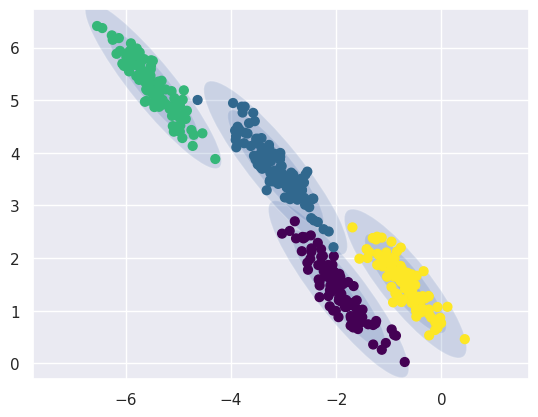

In [21]:
gmm = GaussianMixture(n_components=4, covariance_type="full", random_state=42)
plot_gmm(gmm, X_stretched)

##### covariance_type
- diag: 群組的大小在每個維度可獨立設定，則結果的橢圓形會被限制在對齊的軸線上
- spherical: 限制讓群組的形狀在所有維度中都相同
- full: 讓每個群組可以在任意方向被形塑成橢圓形

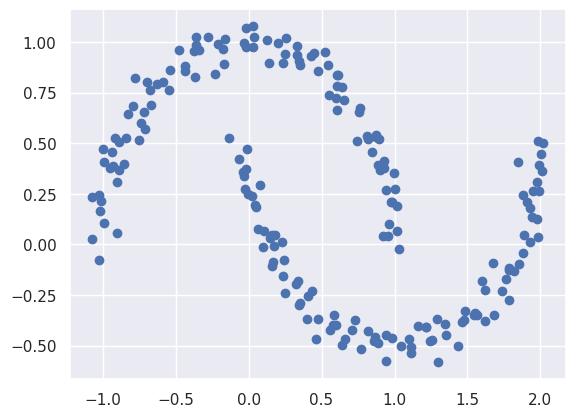

In [22]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=0.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1])

U:  [[-0.98223298 -0.18766558]
 [-0.18766558  0.98223298]]
s:  [0.35984314 0.08616622]
Vt:  [[-0.98223298 -0.18766558]
 [-0.18766558  0.98223298]]
U:  [[-0.98319171 -0.18257619]
 [-0.18257619  0.98319171]]
s:  [0.35922142 0.09010346]
Vt:  [[-0.98319171 -0.18257619]
 [-0.18257619  0.98319171]]


/tmp/ipykernel_536/2286699694.py:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


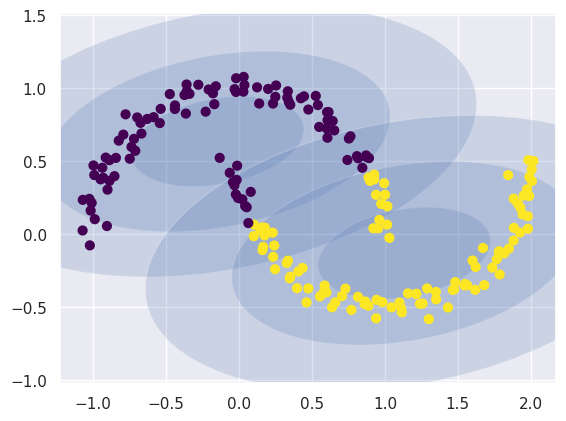

In [23]:
gmm2 = GaussianMixture(n_components=2, covariance_type="full", random_state=0)
plot_gmm(gmm2, Xmoon)

U:  [[-0.98340954  0.18139921]
 [ 0.18139921  0.98340954]]
s:  [0.0187056  0.00180269]
Vt:  [[-0.98340954  0.18139921]
 [ 0.18139921  0.98340954]]
U:  [[ 0.1540622   0.98806115]
 [ 0.98806115 -0.1540622 ]]
s:  [0.02316329 0.00202441]
Vt:  [[ 0.1540622   0.98806115]
 [ 0.98806115 -0.1540622 ]]
U:  [[-0.98431948  0.1763949 ]
 [ 0.1763949   0.98431948]]
s:  [0.03386734 0.00178812]
Vt:  [[-0.98431948  0.1763949 ]
 [ 0.1763949   0.98431948]]
U:  [[ 0.24224812  0.97021433]
 [ 0.97021433 -0.24224812]]
s:  [0.03453846 0.00293159]
Vt:  [[ 0.24224812  0.97021433]
 [ 0.97021433 -0.24224812]]
U:  [[-0.73080186 -0.68258966]
 [-0.68258966  0.73080186]]
s:  [0.05029761 0.00266348]
Vt:  [[-0.73080186 -0.68258966]
 [-0.68258966  0.73080186]]
U:  [[-0.71073504  0.7034598 ]
 [ 0.7034598   0.71073504]]
s:  [0.00233277 0.00095892]
Vt:  [[-0.71073504  0.7034598 ]
 [ 0.7034598   0.71073504]]
U:  [[-0.39564214  0.91840476]
 [ 0.91840476  0.39564214]]
s:  [0.01668262 0.0009436 ]
Vt:  [[-0.39564214  0.91840476]

/tmp/ipykernel_536/2286699694.py:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


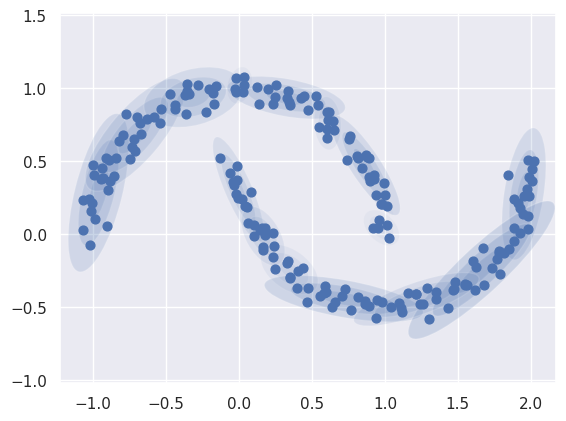

In [24]:
gmm16 = GaussianMixture(n_components=16, covariance_type="full", random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

In [28]:
Xnew

(array([[ 3.72399411e-01,  9.35047954e-01],
        [ 1.68188526e-01,  1.01787838e+00],
        [ 3.74168180e-01,  9.14919658e-01],
        [ 4.54494177e-01,  8.51846042e-01],
        [ 5.68918159e-01,  9.76271560e-01],
        [ 3.89575169e-01,  9.06215832e-01],
        [ 4.98889585e-01,  9.38533073e-01],
        [ 5.39831009e-01,  8.88228388e-01],
        [ 4.47820828e-01,  9.31089778e-01],
        [ 3.84011153e-01,  8.75182649e-01],
        [ 3.31490717e-01,  9.54336659e-01],
        [ 3.17784342e-01,  9.51430996e-01],
        [ 4.06923400e-01,  9.06268252e-01],
        [ 4.12077538e-01,  9.05455163e-01],
        [ 4.20473314e-01,  8.44898708e-01],
        [ 2.97443095e-01,  9.24777412e-01],
        [ 5.47226206e-01,  9.16029580e-01],
        [ 4.46832400e-01,  9.16810518e-01],
        [ 2.27332456e-01,  9.60625414e-01],
        [ 1.61642118e-01,  9.13860945e-01],
        [ 1.93179473e+00,  3.42883294e-01],
        [ 1.90665343e+00,  1.50696886e-01],
        [ 1.94799668e+00,  2.303

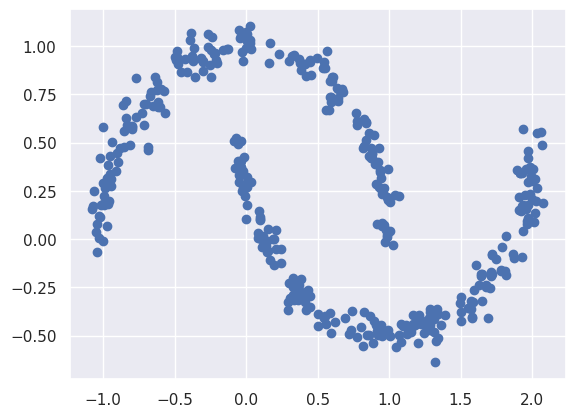

In [29]:
Xnew, ynew = gmm16.sample(400)
plt.scatter(Xnew[:, 0], Xnew[:, 1])

#### 其他修正過度擬合的方法
- AIC: Akaike information criterion
- BIC: Bayesian information criterion

Text(0.5, 0, 'n_components')

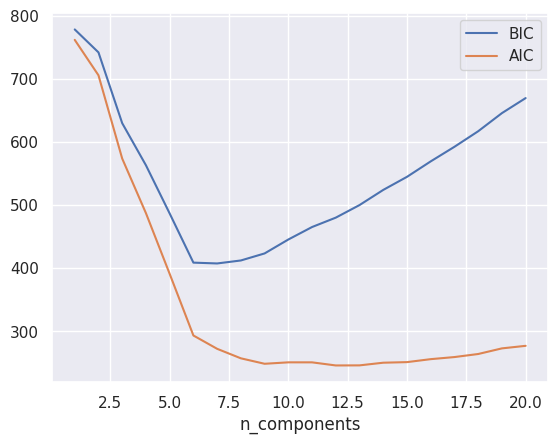

In [30]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type="full", random_state=0).fit(Xmoon)
          for n in n_components]

plt.plot(n_components, [m.bic(Xmoon) for m in models], label="BIC")
plt.plot(n_components, [m.aic(Xmoon) for m in models], label="AIC")
plt.legend(loc="best")
plt.xlabel("n_components")

### 使用GMM產生新資料

In [31]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [32]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw={"xticks": [], "yticks": []})
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap="binary")
        im.set_clim(0, 16)

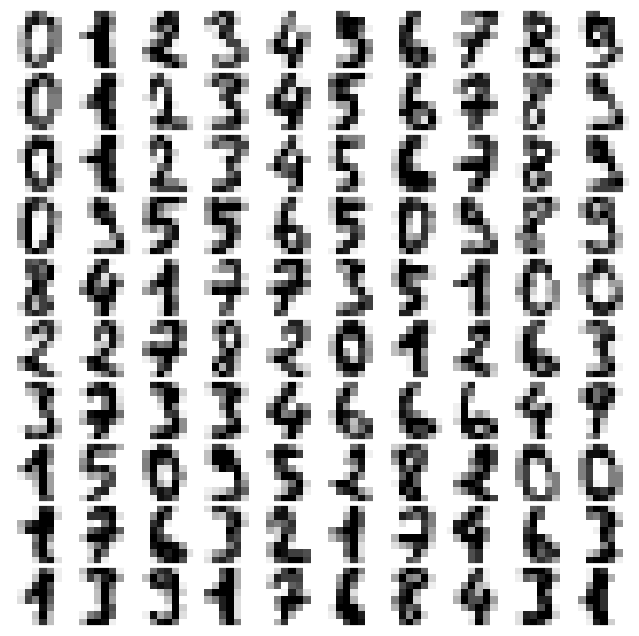

In [33]:
plot_digits(digits.data)

In [34]:
# 在高維度空間GMM不易收斂，因此先在資料上執行可逆的維度降低(PCA)
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True) # 保留99%的變異量
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

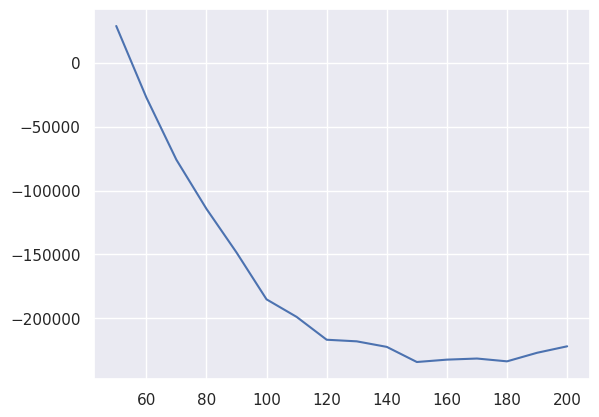

In [35]:
n_components = np.arange(50, 210, 10)
models = [GaussianMixture(n, covariance_type="full", random_state=0)
          for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics)

In [36]:
gmm = GaussianMixture(150, covariance_type="full", random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [38]:
data_new, label_new = gmm.sample(100)
data_new.shape

(100, 41)

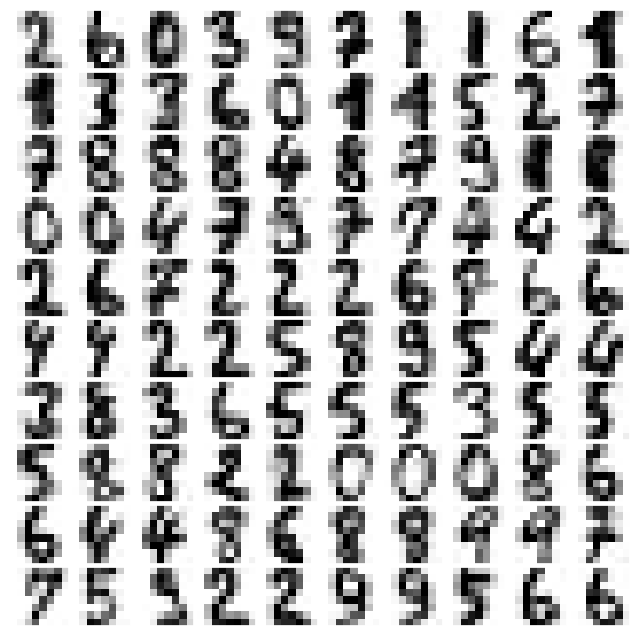

In [39]:
# 由GMM產生的新字元樣本
digits_new = pca.inverse_transform(data_new)
plot_digits(digits_new)